###  [前準備] MeCabサーバーは事前に起動させておくこと
https://github.com/abeja-inc/Platform_handson/tree/master/mecab_api

### [前準備②]下記リンクからデータをダウンロードして、展開ファイルを特定のチャンネルに配置しておくこと
#### `02_カテゴリ分類（学習まで）.ipynb`が最後まで完了していること(チャンネルにtiran_all.csvが配置されていること)
https://drive.google.com/file/d/1qAQkntJqauXt3lL_8jXUiUJXeDA0qFgY/view?usp=sharing
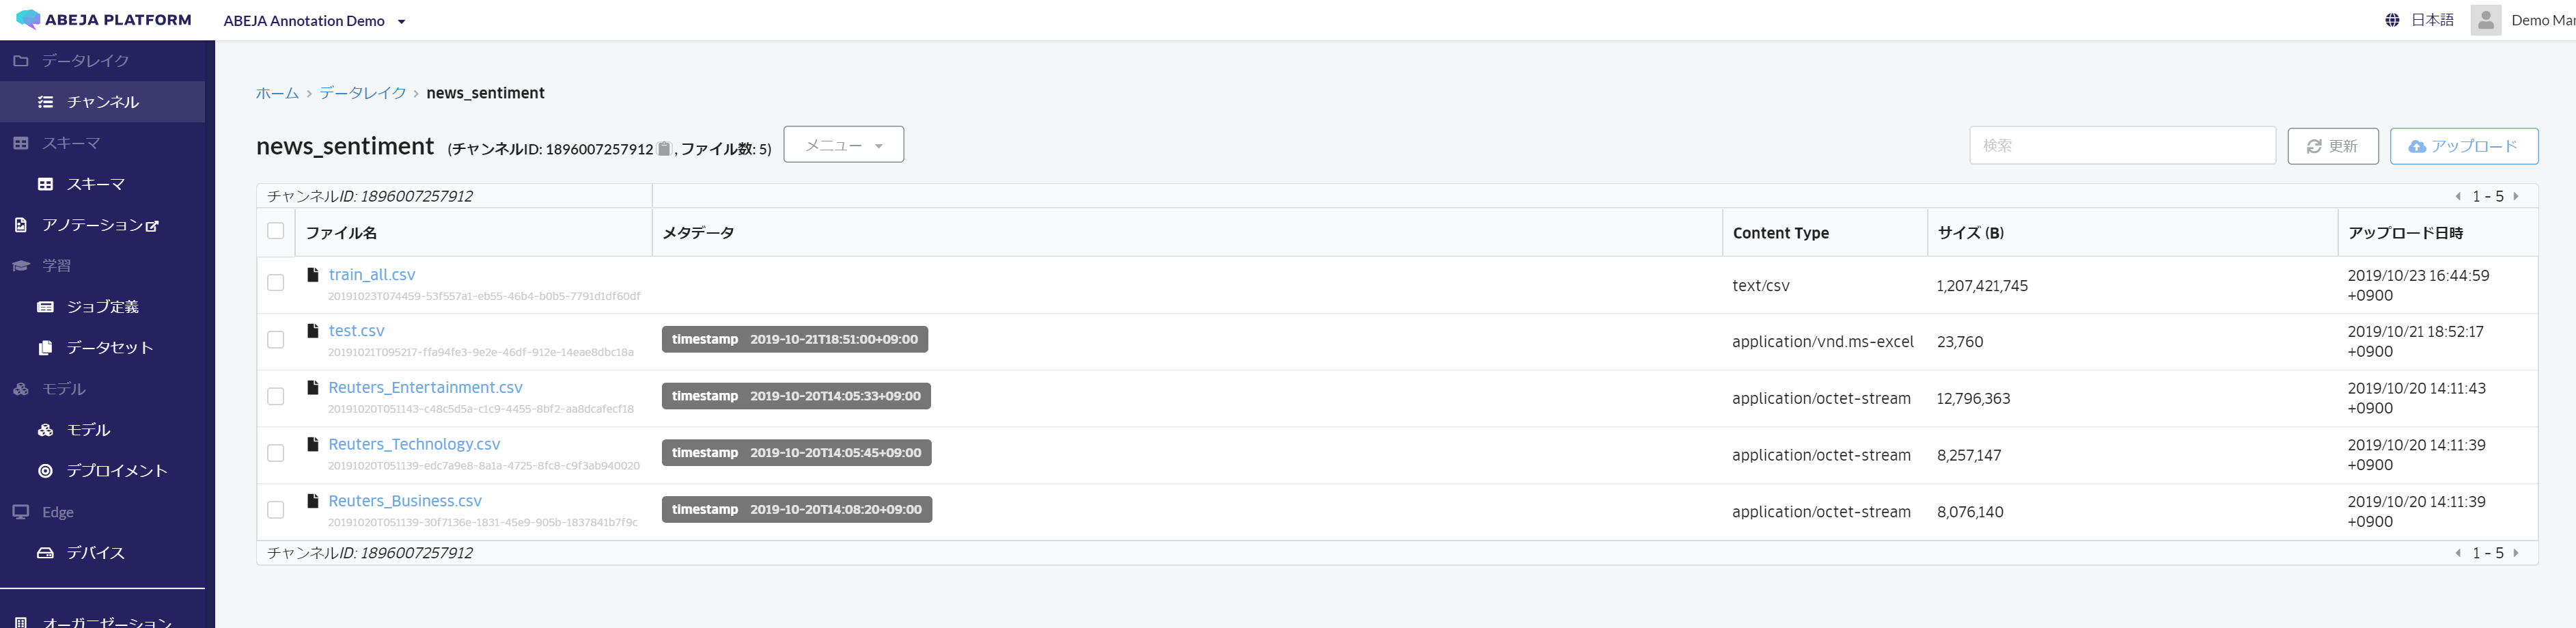

In [21]:
# Pandasの設定
import pandas as pd

In [22]:
# クレデンシャルの設定
credential = {
    'user_id':"XXXXXXXXXXXXX",
    'personal_access_token':"XXXXXXXXXXXXXXXX"
}

In [23]:
'''
データレイクからデータをダウンロードする場合
（時間が少しかかる）
'''

from abeja.datalake import Client as DatalakeClient
from abeja.datalake import APIClient as APIDatalakeClient

import requests

organization_id = "XXXXXXXXXXXXX"
channel_id = "XXXXXXXXXXXXXX"

# datalakeの設定
datalake_client = DatalakeClient(organization_id=organization_id, credential=credential)
channel = datalake_client.get_channel(channel_id)

# データレイクの設定
sentence_dic = {}
for file in channel.list_files():
    filename = file.metadata['filename'].replace(".csv","")
    if filename == "test":   # testファイルのみ処理を実施
        get_url_info = requests.get(file.download_url).text
        sentence_dic[filename] = get_url_info

In [24]:
# データの分割(改行のコードで分割)
for key, value in sentence_dic.items():
    sentence_dic[key] = value.split("\n")

In [25]:
#　各カテゴリの格納状態を確認(Entertainment)
print(len(sentence_dic["test"]))
print(sentence_dic["test"][0])

15
■レートは終値（前日比または前週末比）、安値─高値＜外為市場＞ドル／円JPY= ユーロ／ドルEUR= ユーロ／円EURJPY=午後5時現在 108.55/57 1.1162/66 121.20/24NY午後5時 108.42/44 1.1169/73 121.11/15午後５時のドル／円は、ニューヨーク市場午後５時時点に比べややドル高／円安の１０８円半ば。早朝の取引で英ポンド／円が急落したことで、ドルも連れ安となったが、休日を控えた国内実需の買いなどに支えられ、１０８円半ばまで小反発した。英議会による欧州連合（ＥＵ）離脱案の採決先送りを受けた欧州市場の反応を見極めたいとの声が多く聞かれた。＜株式市場＞日経平均 22548.90円 (56.22円高)安値─高値　　 22515.73円─22581.28円東証出来高 8億9168万株東証売買代金 1兆5304億円東京株式市場で日経平均株価は続伸した。連休の谷間で大きなポジションが取りづらく、高寄りして始まった後は一進一退の展開となった。模様眺めムードも強かったが、下値不安は感じられず、後場にかけて強い基調を維持。終値ベースでは連日の年初来高値更新となった。東証１部騰落数は、値上がり１４３２銘柄に対し、値下がりが６１６銘柄、変わらずが１０７銘柄だった。＜短期金融市場＞　17時07分現在無担保コール翌日物金利(速報ベース) -0.019％ユーロ円金先（20年3月限） 100.025 (+0.005)安値─高値 100.020─100.0303カ月物ＴＢ -0.210 (変わらず)安値─高値 -0.210─-0.215無担保コール翌日物の加重平均レートは、速報ベースでマイナス０．０１９％になった。「積み期前半だが、金融機関による資金調達の動きが強く、従来よりも速いペースで加重平均レートが上昇している」（国内金融機関）という。ユーロ円３カ月金利先物は強含み。＜円債市場＞国債先物・19年12月限 154.07 (-0.16)安値─高値 154.02─154.2810年長期金利(日本相互証券引け値) -0.140％ (+0.015)安値─高値 -0.140─-0.140％国債先物中心限月１２月限は前営業日比１６銭安の１５４円０７銭と続落して取引を終えた。高寄り後、マイナス圏に転じた。黒田日銀総裁のインタビューでの発言が意識され

In [26]:
# json形式に変更するために、リストからdicに持ち方を変更
test_dic = {}
num = 1
for x in sentence_dic["test"]:
    test_dic[str(num)] = x
    num += 1

In [27]:
# dicをjsonに変更
import json
test_json = json.dumps(test_dic, ensure_ascii=False).encode('utf-8')

sentence_dic = {}
sentence_dic["test"] = test_json


In [28]:
import requests

# クレデンシャルの設定
# MeCabサーバの情報を設定しておく
mecab_url = "XXXXXXXXXXXXXXXXXXXXXXX"    #接続先のURL
user_id = "XXXXXXXX"    #ユーザーID
personal_access_token = "XXXXXXXXXXXXXX"   #アクセストークン

# Mecabの実行
mb_result_dic = {}
auth = (user_id,personal_access_token)
for key, value in sentence_dic.items():
    mb_result_dic[key] = requests.post(mecab_url, value, headers={'Content-Type': 'application/json; charset=UTF-8'}, auth=auth)

In [29]:
# 文の終了がEOSであることを確認する
mb_result_dic["test"].json()[1:10000]

'\t記号,一般,*,*,*,*,■,■,■\nレート\t名詞,一般,*,*,*,*,レート,レート,レート\nは\t助詞,係助詞,*,*,*,*,は,ハ,ワ\n終値\t名詞,一般,*,*,*,*,終値,オワリネ,オワリネ\n（\t記号,括弧開,*,*,*,*,（,（,（\n前日比\t名詞,固有名詞,一般,*,*,*,前日比,ゼンジツヒ,ゼンジツヒ\nまたは\t接続詞,*,*,*,*,*,または,マタハ,マタワ\n前\t接頭詞,名詞接続,*,*,*,*,前,ゼン,ゼン\n週末\t名詞,副詞可能,*,*,*,*,週末,シュウマツ,シューマツ\n比\t名詞,接尾,一般,*,*,*,比,ヒ,ヒ\n）\t記号,括弧閉,*,*,*,*,）,）,）\n、\t記号,読点,*,*,*,*,、,、,、\n安値\t名詞,一般,*,*,*,*,安値,ヤスネ,ヤスネ\n─\t記号,一般,*,*,*,*,─,─,─\n高値\t名詞,一般,*,*,*,*,高値,タカネ,タカネ\n＜\t記号,括弧開,*,*,*,*,＜,＜,＜\n外為市場\t名詞,固有名詞,一般,*,*,*,外為市場,ガイタメシジョウ,ガイタメシジョー\n＞\t記号,括弧閉,*,*,*,*,＞,＞,＞\nドル\t名詞,一般,*,*,*,*,ドル,ドル,ドル\n／\t記号,一般,*,*,*,*,／,／,／\n円\t名詞,一般,*,*,*,*,円,エン,エン\nJPY\t名詞,固有名詞,一般,*,*,*,JPY,エン,エン\n=\t記号,一般,*,*,*,*,*\nユーロ\t名詞,一般,*,*,*,*,ユーロ,ユーロ,ユーロ\n／\t記号,一般,*,*,*,*,／,／,／\nドル\t名詞,一般,*,*,*,*,ドル,ドル,ドル\nEUR\t名詞,固有名詞,一般,*,*,*,EUR,ユーロ,ユーロ\n=\t記号,一般,*,*,*,*,*\nユーロ\t名詞,一般,*,*,*,*,ユーロ,ユーロ,ユーロ\n／\t記号,一般,*,*,*,*,／,／,／\n円\t名詞,一般,*,*,*,*,円,エン,エン\nEURJPY\t名詞,一般,*,*,*,*,*\n=\t記号,一般,*,*,*,*,*\n午後5時\t名詞,固有名詞,一般,*,*,*,午後5時,ゴゴゴジ,ゴゴゴジ\n現在\t名詞,副詞可能,*,*,*,*,現在,ゲンザイ,ゲンザイ\n1

In [30]:
# EOSで分割し、再挿入
for key, value in mb_result_dic.items():
    mb_result_dic[key] = value.json().split("EOS")

In [31]:
mb_result_dic["test"][0]

'■\t記号,一般,*,*,*,*,■,■,■\nレート\t名詞,一般,*,*,*,*,レート,レート,レート\nは\t助詞,係助詞,*,*,*,*,は,ハ,ワ\n終値\t名詞,一般,*,*,*,*,終値,オワリネ,オワリネ\n（\t記号,括弧開,*,*,*,*,（,（,（\n前日比\t名詞,固有名詞,一般,*,*,*,前日比,ゼンジツヒ,ゼンジツヒ\nまたは\t接続詞,*,*,*,*,*,または,マタハ,マタワ\n前\t接頭詞,名詞接続,*,*,*,*,前,ゼン,ゼン\n週末\t名詞,副詞可能,*,*,*,*,週末,シュウマツ,シューマツ\n比\t名詞,接尾,一般,*,*,*,比,ヒ,ヒ\n）\t記号,括弧閉,*,*,*,*,）,）,）\n、\t記号,読点,*,*,*,*,、,、,、\n安値\t名詞,一般,*,*,*,*,安値,ヤスネ,ヤスネ\n─\t記号,一般,*,*,*,*,─,─,─\n高値\t名詞,一般,*,*,*,*,高値,タカネ,タカネ\n＜\t記号,括弧開,*,*,*,*,＜,＜,＜\n外為市場\t名詞,固有名詞,一般,*,*,*,外為市場,ガイタメシジョウ,ガイタメシジョー\n＞\t記号,括弧閉,*,*,*,*,＞,＞,＞\nドル\t名詞,一般,*,*,*,*,ドル,ドル,ドル\n／\t記号,一般,*,*,*,*,／,／,／\n円\t名詞,一般,*,*,*,*,円,エン,エン\nJPY\t名詞,固有名詞,一般,*,*,*,JPY,エン,エン\n=\t記号,一般,*,*,*,*,*\nユーロ\t名詞,一般,*,*,*,*,ユーロ,ユーロ,ユーロ\n／\t記号,一般,*,*,*,*,／,／,／\nドル\t名詞,一般,*,*,*,*,ドル,ドル,ドル\nEUR\t名詞,固有名詞,一般,*,*,*,EUR,ユーロ,ユーロ\n=\t記号,一般,*,*,*,*,*\nユーロ\t名詞,一般,*,*,*,*,ユーロ,ユーロ,ユーロ\n／\t記号,一般,*,*,*,*,／,／,／\n円\t名詞,一般,*,*,*,*,円,エン,エン\nEURJPY\t名詞,一般,*,*,*,*,*\n=\t記号,一般,*,*,*,*,*\n午後5時\t名詞,固有名詞,一般,*,*,*,午後5時,ゴゴゴジ,ゴゴゴジ\n現在\t名詞,副詞可能,*,*,*,*,現在,ゲンザイ,ゲンザイ\n

### ベクタライズについては、CountVectorizer, TfidfVectorizerなど簡単にできるライブラリが存在する
- 今回はレクチャーのためロジックを記載しているが、ソースに間違いも発生するため、本来であればライブラリを使うことが好ましい
- gensimライブラリを使用した場合の簡単な方法こちらを参考にしてください。  
https://github.com/abeja-inc/Platform_handson/blob/master/livedoor_classify/notebook/livedoor_data.ipynb

In [32]:
# 辞書読み込み
import json
import pickle

with open("doc_word_dic.json") as f1:
    doc_word_dic = json.load(f1)
with open("doc_wordsum_dic.json") as f2:
    doc_wordsum_dic = json.load(f2)
with open("word_docnum_dic.json") as f3:
    word_docnum_dic = json.load(f3)
with open("word_list.pkl", mode="rb") as f4:
    word_list = pickle.load(f4)

In [40]:
'''
すべての単語の辞書(出現回数)を作る
MeCabから出力された形は下記のような形になる

ロサンゼルス	名詞,固有名詞,地域,一般,*,*,ロサンゼルス,ロサンゼルス,ロサンゼルス

'''
# 辞書の定義 (読み込んだけど結局使わない)
doc_word_dic = {}
doc_wordsum_dic = {}
doc_num = 1


for key, value in mb_result_dic.items():
    for x in value:
        word = x.split("\n")     # 単語レベルまで分割
        doc_word_dic[doc_num] = {}    #　ドキュメントごとの単語出現回数
        for x in word:
            word_detail = x.split(",")
            meta = word_detail[0].split("\t")
            if len(meta) < 2:   # 空白行の対策
                pass
            elif meta[1] in ("名詞"): #, "副詞", "形容詞", "動詞"):
                
                # document内に、ある単語が出現する回数を設定する処理
                if word_detail[6] in doc_word_dic[doc_num]:
                    doc_word_dic[doc_num][word_detail[6]] += 1
                else:
                    doc_word_dic[doc_num][word_detail[6]] = 1
                    
                # documentに登場する単語総数を設定する処理
                if doc_num in doc_wordsum_dic:
                    doc_wordsum_dic[doc_num] += 1
                else:
                    doc_wordsum_dic[doc_num] = 1
                
                # ある単語が登場したドキュメントの数
                if word_detail[6] in word_docnum_dic:
                    if doc_num in word_docnum_dic[word_detail[6]]:
                        pass
                    else:
                        word_docnum_dic[word_detail[6]][doc_num] = 1
                else:
                    word_docnum_dic[word_detail[6]] = {}
                    word_docnum_dic[word_detail[6]][doc_num] = 1
                    
                # wordの辞書を作成 (学習時の断面から追加する必要はない)
                #word_list.append(word_detail[6])
                
        doc_num += 1

In [36]:
# trainで使ったドキュメントの数
!cat train_all.csv | wc -l

18991


In [41]:
# ドキュメントの総数にtrainの総数を含む（正しいか怪しい）
traindoc_num = 18990  #ヘッダー行削除

In [42]:
# test用のファイルの書き出し
import math

# 書き出し用のファイルの作成
f = open("test_all.csv", "w")

num = 1

# labelの書き出し
header = "label1"
for x in range(len(word_list)):
    header = header + "," + "label" + str(x+2)
f.write(header + "\n")

while num < doc_num:
    if num not in doc_wordsum_dic:
        pass
    else:
        text = ""
        for word in word_list:
            if word in doc_word_dic[num]:
                socre = doc_word_dic[num][word] / doc_wordsum_dic[num] * (math.log((doc_num + traindoc_num) / len(word_docnum_dic[word])) + 1)
            else:
                socre = 0
            text = text + "," + str(socre)
        f.write(text + "\n")
    num += 1
f.close()

### 出力されたtest_all.csvをダウンロードする
- test_all.csvをローカルにダウンロードする
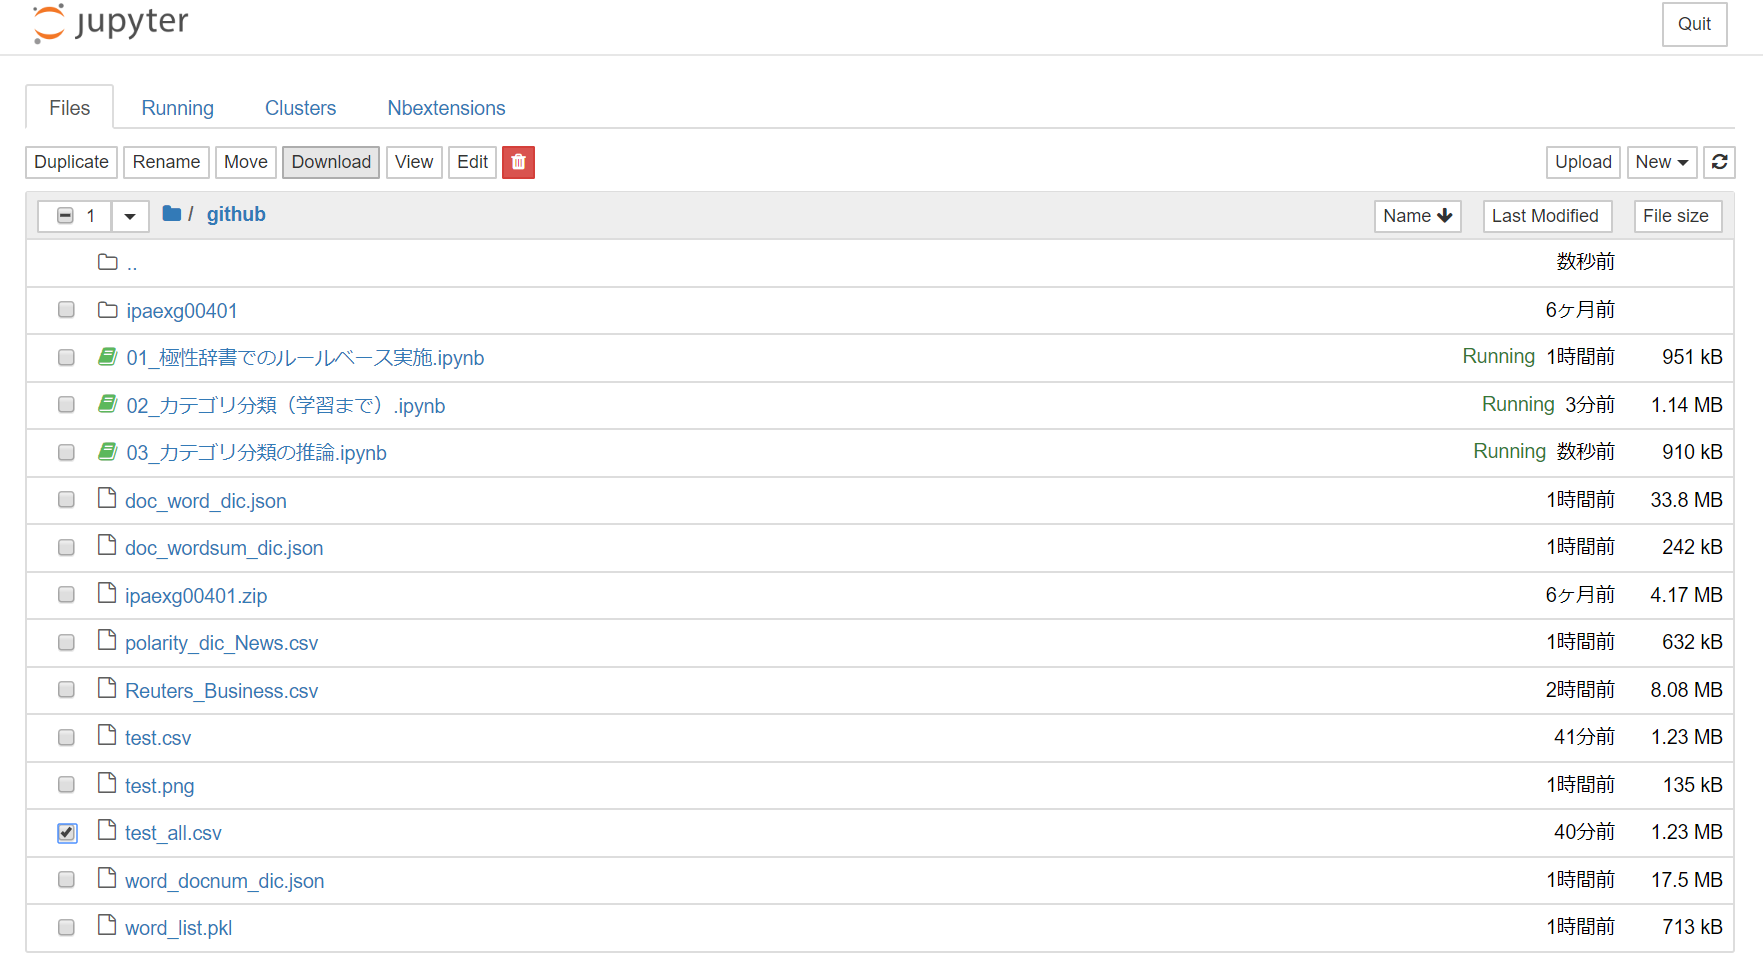

### 作成したデプロイサーバーにアップロードする
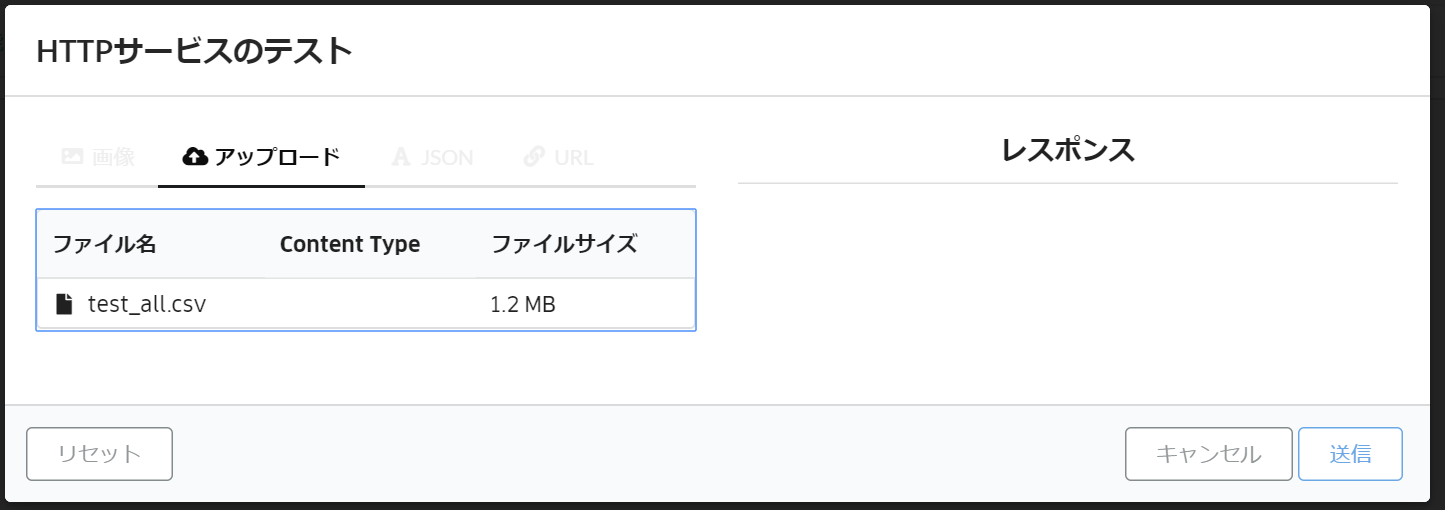

### テスト結果
- 正解は[2 2 2 2 2 1 1 1 1 1 0 0 0 0]
- 一つ誤っている程度なので、それなりに精度は出ている
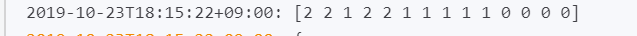